# **History/Verlauf des Trainings darstellen**

In [10]:
#Hilfscode zum finden meines Arbeitsverzeichnis und der vorhanden Dateien
import os
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

input_dir = '/kaggle/input/'

for root, dirs, files in os.walk(input_dir):
    print(f"Verzeichnis: {root}")
    print(f"Unterordner: {dirs}")
    #print(f"Dateien: {files}")
    print('---')

Aktuelles Arbeitsverzeichnis: /kaggle/working
Verzeichnis: /kaggle/input/
Unterordner: ['modelle', 'seminar-lstm']
---
Verzeichnis: /kaggle/input/modelle
Unterordner: ['model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128', 'model_LSTM64_gradclip_RedPl', 'model_1Hour_LSTM64_gradclip_RedPl_seq336', 'model_GRU64', 'model_LSTM32x2_gradclip_RedPl_seq336_B128', 'model_GRU64_gradclip_RedPl_seq672', 'model_GRU32x2_gradclip_RedPl_seq336_B128', 'model_LSTM64', 'model_LSTM64_gradclip_RedPl_seq672', 'model_1Hour_GRU64_gradclip_RedPl_seq336', 'model_GRU64_gradclip_RedPl', 'model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128']
---
Verzeichnis: /kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128
Unterordner: []
---
Verzeichnis: /kaggle/input/modelle/model_LSTM64_gradclip_RedPl
Unterordner: []
---
Verzeichnis: /kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336
Unterordner: []
---
Verzeichnis: /kaggle/input/modelle/model_GRU64
Unterordner: []
---
Verzeichnis: /kaggle/input/modelle/m

In [2]:
#Hilfscode zum finden der .pkl-Dateien (History-Dateien der Modelle)
import os

input_dir = '/kaggle/input/modelle'
keyword = 'LSTM64'  # Suchwort zum eingrenzen der .pkl-Dateien

filtered_pkl_files = []
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith('.pkl') and keyword in file:
            filtered_pkl_files.append(os.path.join(root, file))

print(f"Gefundene .pkl-Dateien mit '{keyword}':")
for pf in filtered_pkl_files:
    print(pf)

print(f"\nGesamtzahl der gefundenen .pkl-Dateien mit '{keyword}': {len(filtered_pkl_files)}")


Gefundene .pkl-Dateien mit 'LSTM64':
/kaggle/input/modelle/model_LSTM64_gradclip_RedPl/model_LSTM64_gradclip_RedPl_history.pkl
/kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336/model_1Hour_LSTM64_gradclip_RedPl_seq336_history.pkl
/kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128/model_LSTM64x2_gradclip_RedPl_seq672_B128_history.pkl
/kaggle/input/modelle/model_LSTM64/model_LSTM64_history.pkl
/kaggle/input/modelle/model_LSTM64_gradclip_RedPl_seq672/model_LSTM64_gradclip_RedPl_seq672_history.pkl

Gesamtzahl der gefundenen .pkl-Dateien mit 'LSTM64': 5


History erfolgreich geladen!


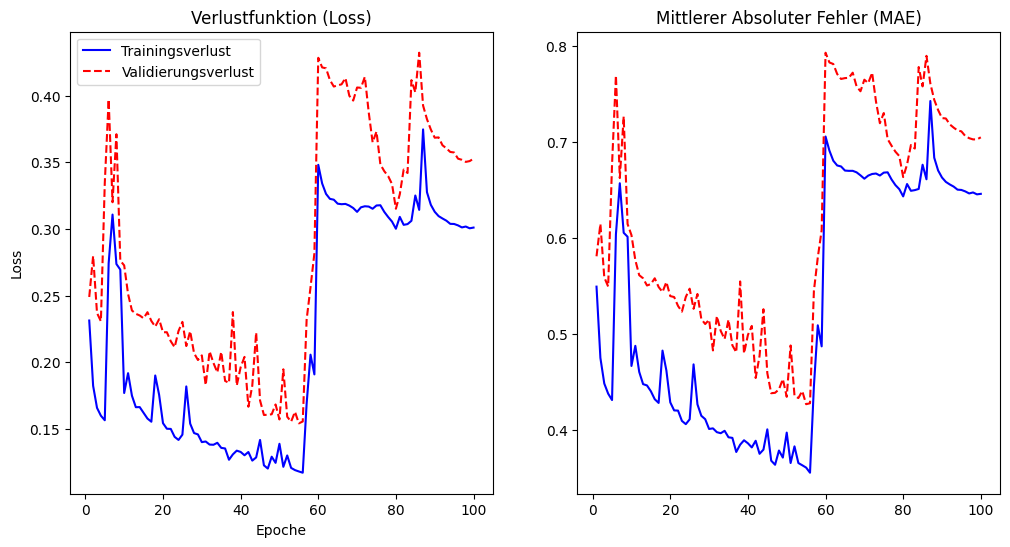

In [3]:
#Darstellung mit  Matplot

import pickle
import os
import matplotlib.pyplot as plt

# 1. History laden
history_path = '/kaggle/input/modelle/model_LSTM64/model_LSTM64_history.pkl'


if os.path.exists(history_path):
    with open(history_path, 'rb') as file:
        loaded_history = pickle.load(file)
    print("History erfolgreich geladen!")
    
    # 2. Plots erstellen
    loss = loaded_history['loss']
    val_loss = loaded_history['val_loss']
    mae = loaded_history['mae']
    val_mae = loaded_history['val_mae']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 6))

    # Loss-Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Trainingsverlust')
    plt.plot(epochs, val_loss, 'r--', label='Validierungsverlust')
    plt.title('Verlustfunktion (Loss)')
    plt.xlabel('Epoche')
    plt.ylabel('Loss')
    plt.legend()

    # MAE-Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, mae, 'b-', label='Trainings-MAE')
    plt.plot(epochs, val_mae, 'r--', label='Validierungs-MAE')
    plt.title('Mittlerer Absoluter Fehler (MAE)')


/kaggle/working/modelle_vergleich.png

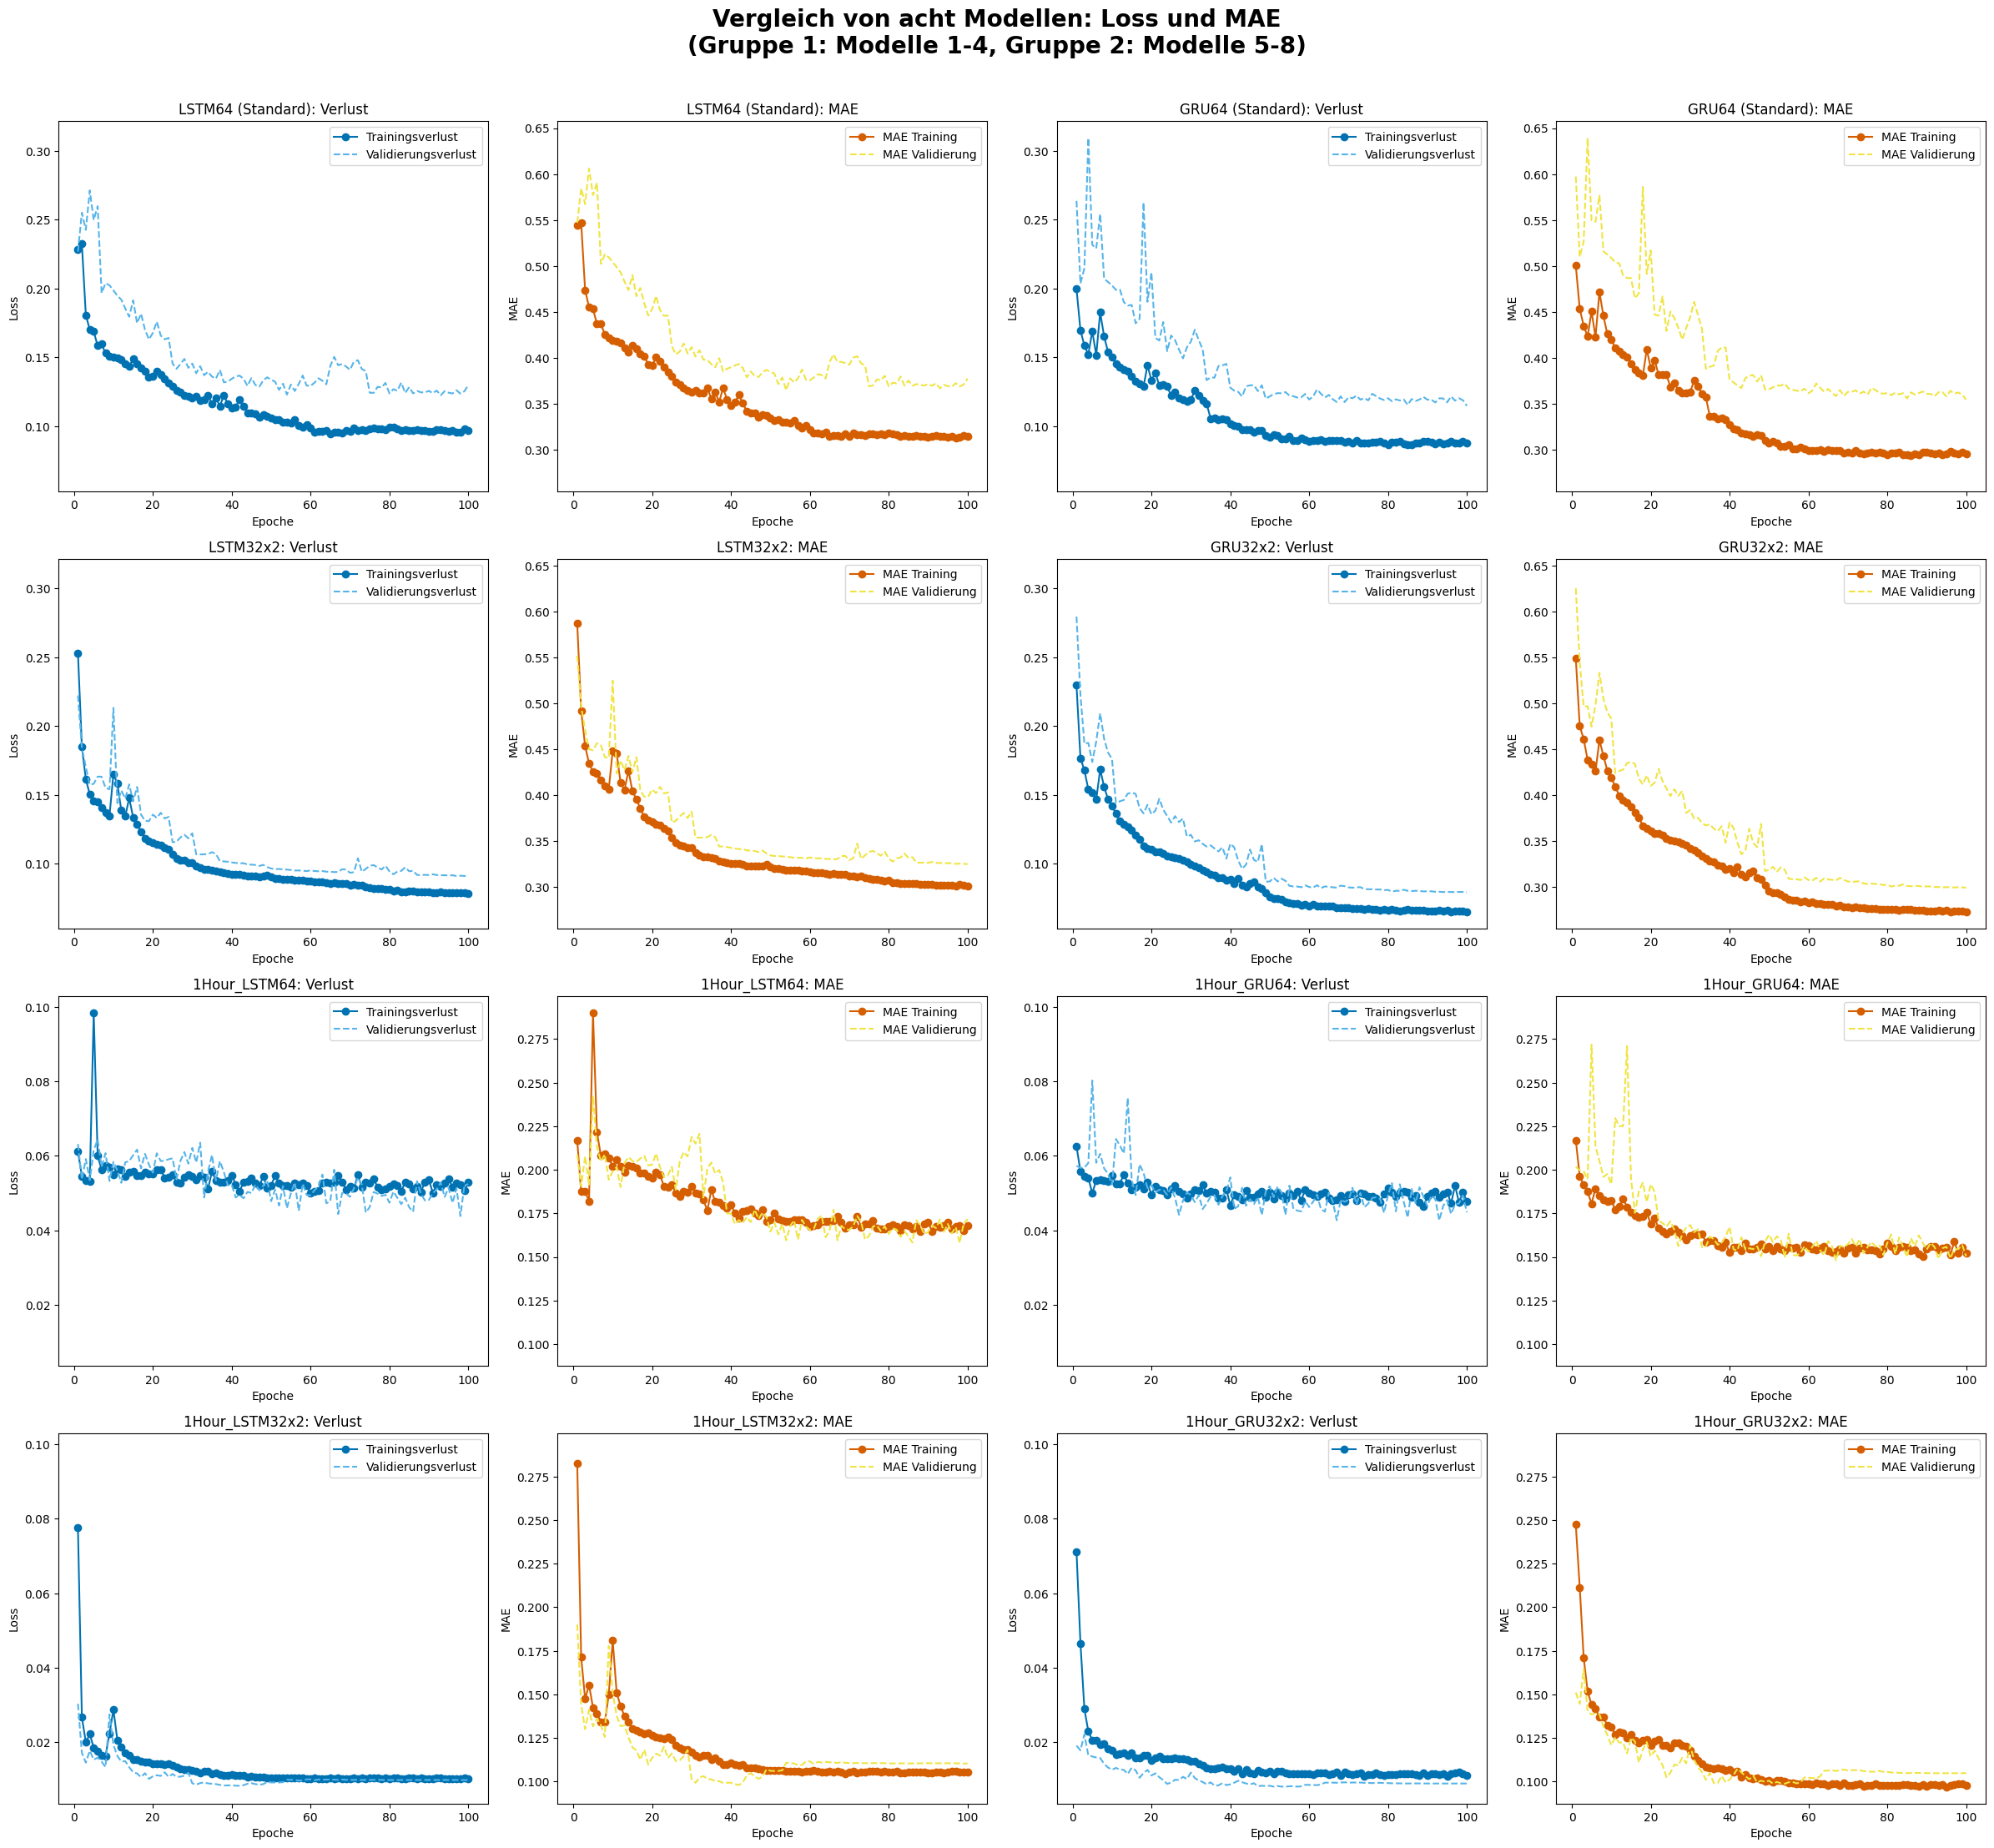

In [4]:
#Gleichzetige Darstellung der 8 Modelle mit Matplot  (verwendete Grafik 14 in Anhang)

import matplotlib.pyplot as plt
import os
import pickle

# Farbschema für bessere Lesbarkeit und Barrierefreiheit
color_train_loss = "#0072B2"    # Blau
color_val_loss   = "#56B4E9"    # Hellblau
color_train_mae  = "#D55E00"    # Orange
color_val_mae    = "#F0E442"    # Gelb

history_paths = [
    "/kaggle/input/modelle/model_LSTM64_gradclip_RedPl/model_LSTM64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_GRU64_gradclip_RedPl/model_GRU64_gradclip_RedPl_history.pkl",
    "/kaggle/input/modelle/model_LSTM32x2_gradclip_RedPl_seq336_B128/model_LSTM64x2_gradclip_RedPl_seq672_B128_history.pkl",
    "/kaggle/input/modelle/model_GRU32x2_gradclip_RedPl_seq336_B128/model_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM64_gradclip_RedPl_seq336/model_1Hour_LSTM64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU64_gradclip_RedPl_seq336/model_1Hour_GRU64_gradclip_RedPl_seq336_history.pkl",
    "/kaggle/input/modelle/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128_history.pkl",
    "/kaggle/input/modelle/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128/model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128_history.pkl"
]

model_titles = [
    "LSTM64 (Standard)",
    "GRU64 (Standard)",
    "LSTM32x2",
    "GRU32x2",
    "1Hour_LSTM64",
    "1Hour_GRU64",
    "1Hour_LSTM32x2",
    "1Hour_GRU32x2"
]

def load_history(path):
    if not os.path.exists(path):
        print(f"❌ Datei nicht gefunden: {path}")
        return None
    with open(path, 'rb') as file:
        return pickle.load(file)

history_dicts = [load_history(p) for p in history_paths]

if any(h is None for h in history_dicts):
    print("Mindestens eine History-Datei konnte nicht geladen werden. Bitte prüfe die Pfade.")
else:
    epochs = [range(1, len(h["loss"]) + 1) for h in history_dicts]

    # Skalen für Gruppe 1 (erste vier Modelle)
    all_mae_1, all_loss_1 = [], []
    for h in history_dicts[:4]:
        all_mae_1.extend(h["mae"])
        all_mae_1.extend(h["val_mae"])
        all_loss_1.extend(h["loss"])
        all_loss_1.extend(h["val_loss"])
    min_mae_1, max_mae_1 = min(all_mae_1), max(all_mae_1)
    margin_mae_1 = 0.05 * (max_mae_1 - min_mae_1)
    min_mae_1 -= margin_mae_1
    max_mae_1 += margin_mae_1
    min_loss_1, max_loss_1 = min(all_loss_1), max(all_loss_1)
    margin_loss_1 = 0.05 * (max_loss_1 - min_loss_1)
    min_loss_1 -= margin_loss_1
    max_loss_1 += margin_loss_1

    # Skalen für Gruppe 2 (letzte vier Modelle)
    all_mae_2, all_loss_2 = [], []
    for h in history_dicts[4:]:
        all_mae_2.extend(h["mae"])
        all_mae_2.extend(h["val_mae"])
        all_loss_2.extend(h["loss"])
        all_loss_2.extend(h["val_loss"])
    min_mae_2, max_mae_2 = min(all_mae_2), max(all_mae_2)
    margin_mae_2 = 0.05 * (max_mae_2 - min_mae_2)
    min_mae_2 -= margin_mae_2
    max_mae_2 += margin_mae_2
    min_loss_2, max_loss_2 = min(all_loss_2), max(all_loss_2)
    margin_loss_2 = 0.05 * (max_loss_2 - min_loss_2)
    min_loss_2 -= margin_loss_2
    max_loss_2 += margin_loss_2

    plt.figure(figsize=(24, 22))

    for i in range(8):
        # Wähle die Skalen je nach Gruppe
        if i < 4:
            min_loss, max_loss = min_loss_1, max_loss_1
            min_mae, max_mae = min_mae_1, max_mae_1
        else:
            min_loss, max_loss = min_loss_2, max_loss_2
            min_mae, max_mae = min_mae_2, max_mae_2

        # Loss-Plot
        plt.subplot(4, 4, 2*i + 1)
        plt.plot(epochs[i], history_dicts[i]["loss"], "o-", color=color_train_loss, label="Trainingsverlust")
        plt.plot(epochs[i], history_dicts[i]["val_loss"], "--", color=color_val_loss, label="Validierungsverlust")
        plt.title(f"{model_titles[i]}: Verlust")
        plt.xlabel("Epoche")
        plt.ylabel("Loss")
        plt.ylim(min_loss, max_loss)
        plt.legend()
        # MAE-Plot
        plt.subplot(4, 4, 2*i + 2)
        plt.plot(epochs[i], history_dicts[i]["mae"], "o-", color=color_train_mae, label="MAE Training")
        plt.plot(epochs[i], history_dicts[i]["val_mae"], "--", color=color_val_mae, label="MAE Validierung")
        plt.title(f"{model_titles[i]}: MAE")
        plt.xlabel("Epoche")
        plt.ylabel("MAE")
        plt.ylim(min_mae, max_mae)
        plt.legend()

    plt.figtext(0.5, 0.98, "Vergleich von acht Modellen: Loss und MAE\n(Gruppe 1: Modelle 1-4, Gruppe 2: Modelle 5-8)", ha="center", fontsize=20, weight="bold")
    plt.subplots_adjust(hspace=0.7, wspace=0.4)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.savefig('modelle_vergleich.png', dpi=300, bbox_inches='tight')
    from IPython.display import FileLink, display
    display(FileLink('modelle_vergleich.png'))

    
    plt.show()


In [5]:
#Hilfscode zum finden der Epoche für jedes Modell, in der das beste MAE Ergebnis für den Validations Datensatz aufgetreten ist (Also das beste Modell im Training)

import pandas as pd
import pickle
import os
import numpy as np

def analyze_best_epochs_with_params(base_path='/kaggle/input/modelle'):
    results = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith('.pkl'):
                model_name = os.path.basename(root)
                pkl_path = os.path.join(root, file)
                try:
                    if os.path.getsize(pkl_path) == 0:
                        continue
                    with open(pkl_path, 'rb') as f:
                        history = pickle.load(f)
                    if not isinstance(history, dict):
                        continue
                    # Beste Epoche für Validation MAE
                    if 'val_mae' in history and len(history['val_mae']) > 0:
                        val_mae_arr = np.array(history['val_mae'])
                        best_mae_epoch = int(np.argmin(val_mae_arr))
                        best_val_mae = float(val_mae_arr[best_mae_epoch])
                        # Auch Loss für diese Epoche
                        best_val_loss = float(history['val_loss'][best_mae_epoch]) if 'val_loss' in history else np.nan
                        # Auch Training-Werte für diese Epoche
                        train_mae = float(history['mae'][best_mae_epoch]) if 'mae' in history else np.nan
                        train_loss = float(history['loss'][best_mae_epoch]) if 'loss' in history else np.nan
                        # Parameter, falls vorhanden
                        params = history.get('params') or history.get('hyperparameters') or history.get('config') or {}
                        params_str = "; ".join([f"{k}={v}" for k, v in params.items()]) if isinstance(params, dict) else str(params)
                        results.append({
                            'Modell': model_name,
                            'Beste Epoche': best_mae_epoch + 1,
                            'Val_MAE': best_val_mae,
                            'Val_Loss': best_val_loss,
                            'Train_MAE': train_mae,
                            'Train_Loss': train_loss,
                            'Parameter': params_str
                        })
                except Exception as e:
                    print(f"Fehler bei {pkl_path}: {e}")
    return results

def main():
    print("Starte Analyse der besten Epochen und Modell-Parameter ...")
    results = analyze_best_epochs_with_params()
    if not results:
        print("Keine gültigen History-Dateien gefunden!")
        return
    df = pd.DataFrame(results)
    # Nach bestem Val_MAE sortieren
    df = df.sort_values('Val_MAE')
    
    # Übersichtliche Pandas-Tabelle im Notebook
    try:
        from IPython.display import display
        display(df)
    except ImportError:
        print(df.to_string(index=False, float_format='%.6f', max_colwidth=80))
    
    # Markdown-Tabelle als Text für Dokumentation
    print("\nMarkdown-Tabelle für Dokumentation/Kopieren:\n")
    print(df.to_markdown(index=False, floatfmt=".6f"))
    
    # Als CSV speichern
    df.to_csv('beste_epoche_und_parameter.csv', index=False)
    print("\nErgebnisse gespeichert in: beste_epoche_und_parameter.csv")
    return df

if __name__ == "__main__":
    main()



Starte Analyse der besten Epochen und Modell-Parameter ...


,Modell,Beste Epoche,Val_MAE,Val_Loss,Train_MAE,Train_Loss,Parameter
11,model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128,42,0.097977,0.008301,0.109434,0.011052,
0,model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128,54,0.098717,0.008061,0.099928,0.011858,
9,model_1Hour_GRU64_gradclip_RedPl_seq336,67,0.148003,0.042720,0.153378,0.048306,
2,model_1Hour_LSTM64_gradclip_RedPl_seq336,98,0.157998,0.043843,0.168103,0.052356,
6,model_GRU32x2_gradclip_RedPl_seq336_B128,100,0.299116,0.079205,0.272739,0.064945,
4,model_LSTM32x2_gradclip_RedPl_seq336_B128,100,0.324897,0.091007,0.301031,0.078453,
5,model_GRU64_gradclip_RedPl_seq672,89,0.345944,0.108421,0.309146,0.093229,
10,model_GRU64_gradclip_RedPl,100,0.354314,0.114838,0.295242,0.087776,
1,model_LSTM64_gradclip_RedPl,54,0.364562,0.123003,0.329651,0.102765,
8,model_LSTM64_gradclip_RedPl_seq672,95,0.401948,0.138279,0.373740,0.126924,



Markdown-Tabelle für Dokumentation/Kopieren:

| Modell                                          |   Beste Epoche |   Val_MAE |   Val_Loss |   Train_MAE |   Train_Loss | Parameter   |
|:------------------------------------------------|---------------:|----------:|-----------:|------------:|-------------:|:------------|
| model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128 |             42 |  0.097977 |   0.008301 |    0.109434 |     0.011052 |             |
| model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128  |             54 |  0.098717 |   0.008061 |    0.099928 |     0.011858 |             |
| model_1Hour_GRU64_gradclip_RedPl_seq336         |             67 |  0.148003 |   0.042720 |    0.153378 |     0.048306 |             |
| model_1Hour_LSTM64_gradclip_RedPl_seq336        |             98 |  0.157998 |   0.043843 |    0.168103 |     0.052356 |             |
| model_GRU32x2_gradclip_RedPl_seq336_B128        |            100 |  0.299116 |   0.079205 |    0.272739 |     0.064945 |         

# **Den Datensatz darstellen**

In [6]:
#Laden des Datensatz
import pandas as pd
import numpy as np

csv_path = "/kaggle/input/seminar-lstm/Gesamterzeugung_hourly.csv"
neu = pd.read_csv(csv_path, index_col='Datum', parse_dates=True)
print(f"🕐 Typ der ersten Spalte: {type(neu.iloc[1, 0])}")
display(neu.iloc[50000:50003])
neu.head(-3)

🕐 Typ der ersten Spalte: <class 'numpy.float64'>


,Stromerzeugung Gesamt
Datum,
2020-09-14 09:00:00,15478.25
2020-09-14 10:00:00,16995.25
2020-09-14 11:00:00,17822.00


,Stromerzeugung Gesamt
Datum,
2015-01-01 00:00:00,12884.25
2015-01-01 01:00:00,12552.00
2015-01-01 02:00:00,12394.50
2015-01-01 03:00:00,12112.50
2015-01-01 04:00:00,12042.50
...,...
2025-05-23 16:00:00,15602.00
2025-05-23 17:00:00,14831.75
2025-05-23 18:00:00,13996.75


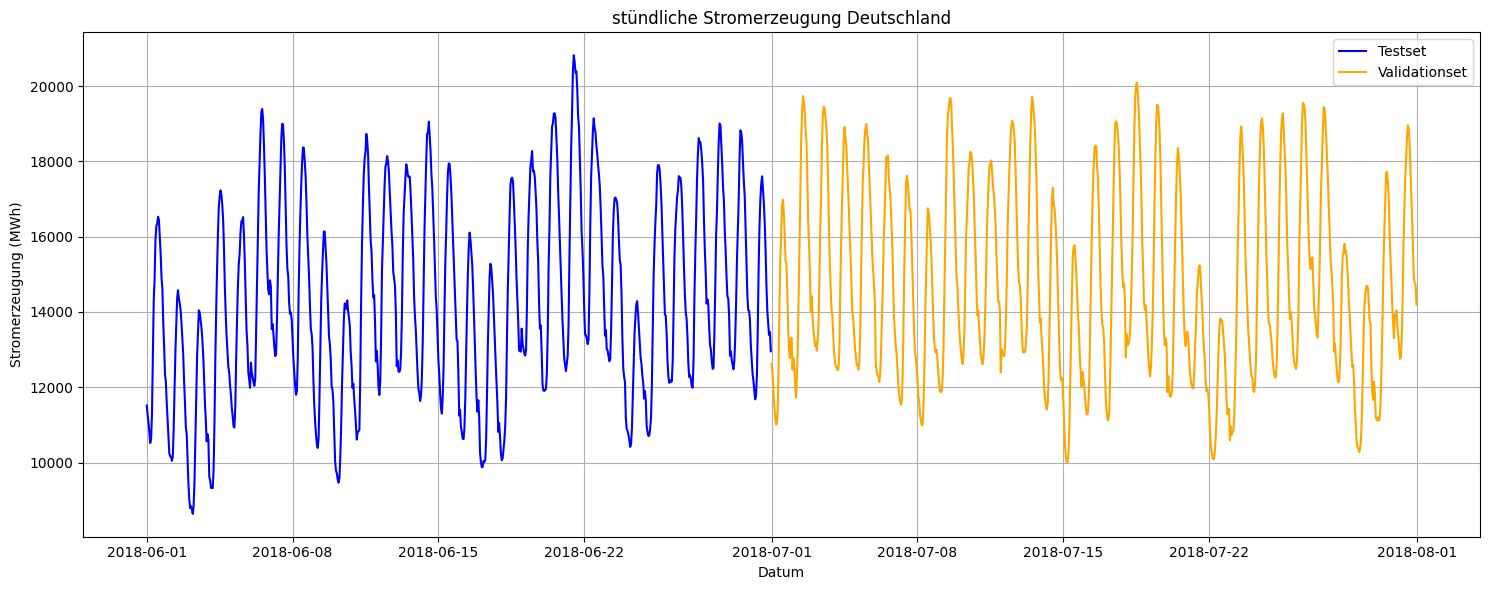

/kaggle/working/stromerzeugung_plot.png

In [7]:
#Graphische Darstellung des Datensatz, kleinerer Zeitraum. (verwendete Grafik 11 in Anhang)
import matplotlib.pyplot as plt
from IPython.display import FileLink, display
file_path = 'stromerzeugung_plot.png'  
# Auswahl der beiden Zeiträume
zeitraum1 = neu.loc['2018-06-01 00:00:00':'2018-06-30 23:00:00', 'Stromerzeugung Gesamt']
zeitraum2 = neu.loc['2018-07-01 00:00:00':'2018-07-31 23:00:00', 'Stromerzeugung Gesamt']

# Plot erstellen
plt.figure(figsize=(15, 6))
plt.plot(zeitraum1.index, zeitraum1.values, label='Testset', color='blue')         #Testset war ein schlechter Name... Trainingsset wäre klarer gewesen
plt.plot(zeitraum2.index, zeitraum2.values, label='Validationset', color='orange')
plt.title('stündliche Stromerzeugung Deutschland')
plt.xlabel('Datum')
plt.ylabel('Stromerzeugung (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(file_path)
plt.show()


display(FileLink(file_path)) #Zum Downloaden als PNG

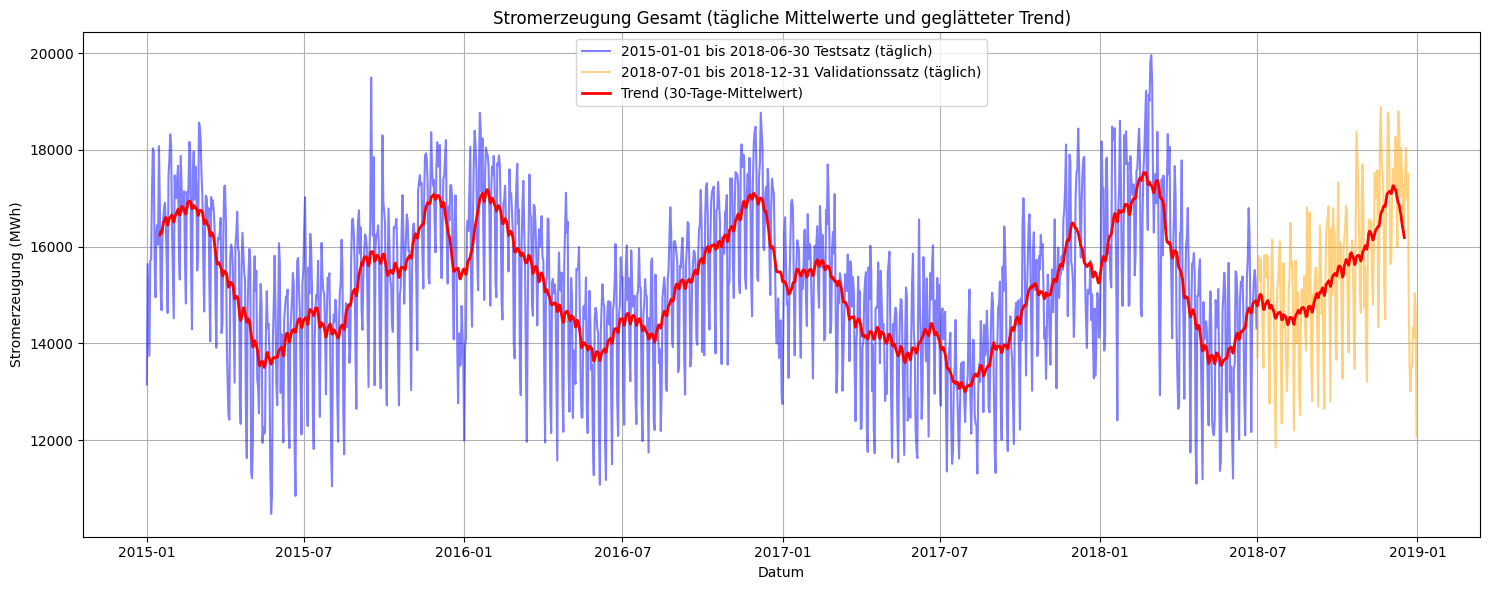

/kaggle/working/stromerzeugung_plot2.png

In [8]:
#Graphische Darstellung des Datensatz, kompletter Zeitraum. (verwendete Grafik 12 in Anhang)
#Mit täglichem Mittelwert der Stromerzeugung und Trendline 30Tage Mittelwert
import matplotlib.pyplot as plt
from IPython.display import FileLink, display

file_path = 'stromerzeugung_plot2.png'

# Tägliche Mittelwerte berechnen
zeitraum1_tag = neu.loc['2015-01-01 00:00:00':'2018-06-30 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()
zeitraum2_tag = neu.loc['2018-07-01 00:00:00':'2018-12-31 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()
zeitraum3_tag = neu.loc['2015-01-01 00:00:00':'2018-12-31 23:00:00', 'Stromerzeugung Gesamt'].resample('D').mean()
# Rollierender Mittelwert (z.B. 30 Tage)
trend1 = zeitraum3_tag.rolling(window=30, center=True).mean()


# Plot erstellen
plt.figure(figsize=(15, 6))
plt.plot(zeitraum1_tag.index, zeitraum1_tag.values, label='2015-01-01 bis 2018-06-30 Testsatz (täglich)', color='blue', alpha=0.5)          #Testsatz war ein schlechter Name... Trainingssatz wäre klarer gewesen
plt.plot(zeitraum2_tag.index, zeitraum2_tag.values, label='2018-07-01 bis 2018-12-31 Validationssatz (täglich)', color='orange', alpha=0.5)
plt.plot(trend1.index, trend1.values, label='Trend (30-Tage-Mittelwert)', color='red', linewidth=2)
#plt.plot(trend2.index, trend2.values,  color='red', linewidth=2)
plt.title('Stromerzeugung Gesamt (tägliche Mittelwerte und geglätteter Trend)')
plt.xlabel('Datum')
plt.ylabel('Stromerzeugung (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(file_path)
plt.show()

display(FileLink(file_path)) #Zum Downloaden als PNG

In [9]:
#Tabellarische Darstellung des Datensatz  (verwendete Grafik 13 in Anhang)

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import FileLink, display

# Beispiel: Die ersten 10 Zeilen als Tabelle darstellen
df_head = neu.head(10)

fig, ax = plt.subplots(figsize=(10, 3))  # Größe anpassen
ax.axis('off')  # Achsen ausblenden
table = ax.table(
    cellText=df_head.values,
    colLabels=df_head.columns,
    rowLabels=df_head.index.strftime('%Y-%m-%d %H:%M'),  # falls DatetimeIndex
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Größe der Zellen anpassen

plt.tight_layout()
plt.savefig('df_head.png', dpi=300, bbox_inches='tight')
plt.close()
display(FileLink('df_head.png')) #Zum Downloaden als PNG

/kaggle/working/df_head.png

# Neu, Visualisierung für Präsentation

## Dataset Laden

In [14]:

import pandas as pd
import numpy as np

csv_path = "/kaggle/input/seminar-lstm/Gesamterzeugung_hourly.csv"
neu = pd.read_csv(csv_path, index_col='Datum', parse_dates=True)
print(f"🕐 Typ der ersten Spalte: {type(neu.iloc[1, 0])}")
display(neu.iloc[50000:50003])
neu.head(-3)

🕐 Typ der ersten Spalte: <class 'numpy.float64'>


,Stromerzeugung Gesamt
Datum,
2020-09-14 09:00:00,15478.25
2020-09-14 10:00:00,16995.25
2020-09-14 11:00:00,17822.00


,Stromerzeugung Gesamt
Datum,
2015-01-01 00:00:00,12884.25
2015-01-01 01:00:00,12552.00
2015-01-01 02:00:00,12394.50
2015-01-01 03:00:00,12112.50
2015-01-01 04:00:00,12042.50
...,...
2025-05-23 16:00:00,15602.00
2025-05-23 17:00:00,14831.75
2025-05-23 18:00:00,13996.75


## Trainset (1h) 

In [21]:
import pandas as pd



# Trainingsdaten für Mittelwert und Standardabweichung bestimmen
Strom_train = neu["Stromerzeugung Gesamt"]["2015-01-01 00:00:00":"2018-06-30 23:00:00"]
mean = Strom_train.mean()
std = Strom_train.std()

# Validierungs- und Testdaten extrahieren
Strom_valid = neu["Stromerzeugung Gesamt"]["2018-07-01 00:00:00":"2018-12-31 23:00:00"]
Strom_test = neu["Stromerzeugung Gesamt"]["2019-01-01 00:00:00":"2019-06-01 23:00:00"]

# Alle Sets normalisieren (immer mit Trainings-mean und -std!)
Strom_train_norm = (Strom_train - mean) / std
Strom_valid_norm = (Strom_valid - mean) / std
Strom_test_norm = (Strom_test - mean) / std


Trainingsset:
count    3.064700e+04
mean     3.116029e-16
std      1.000000e+00
min     -3.028480e+00
25%     -7.379383e-01
50%      4.656548e-03
75%      7.666593e-01
max      3.644074e+00
Name: Stromerzeugung Gesamt, dtype: float64

Validierungsset:
count    4417.000000
mean        0.118658
std         0.960798
min        -2.277226
25%        -0.661427
50%         0.100015
75%         0.926252
max         2.255466
Name: Stromerzeugung Gesamt, dtype: float64

Testset:
count    3647.000000
mean        0.225165
std         1.105930
min        -2.872911
25%        -0.545642
50%         0.271579
75%         1.026807
max         2.500484
Name: Stromerzeugung Gesamt, dtype: float64


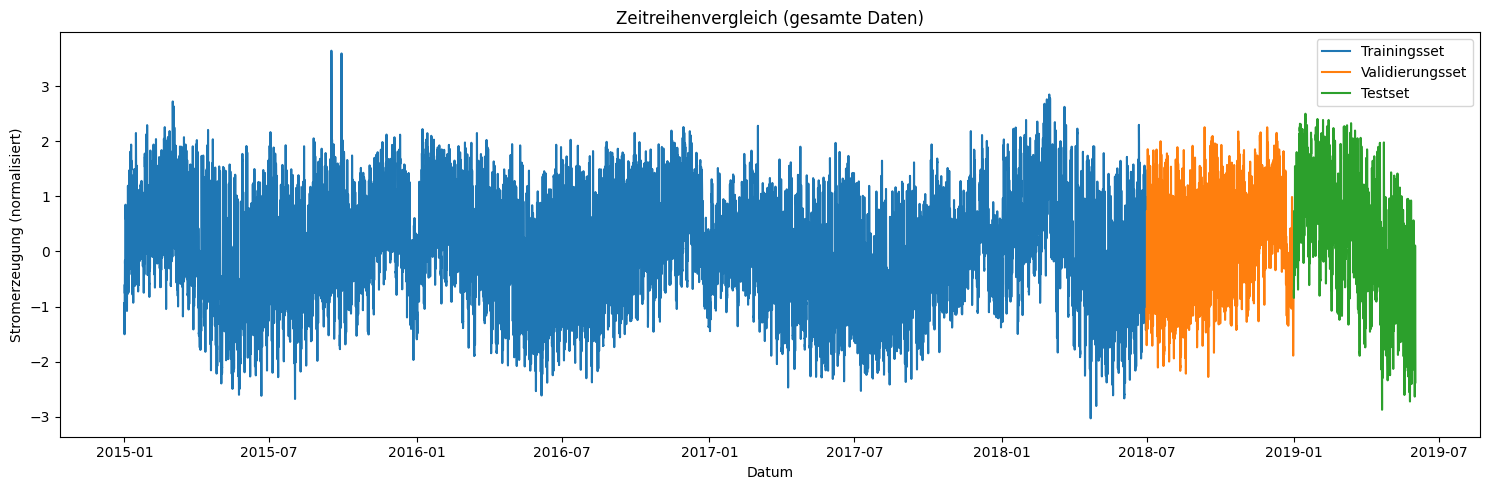

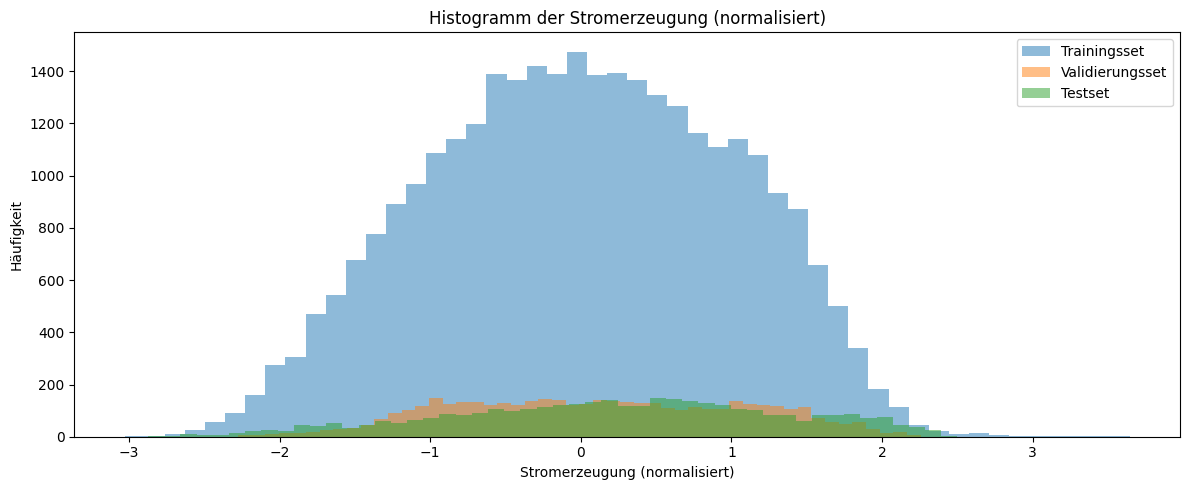

<Figure size 1200x400 with 0 Axes>

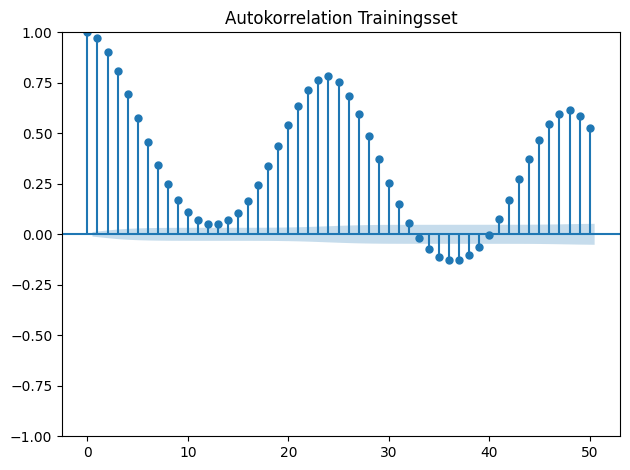

<Figure size 1200x400 with 0 Axes>

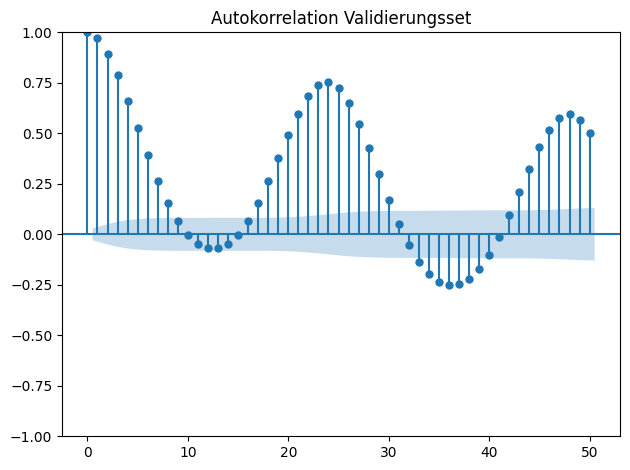

<Figure size 1200x400 with 0 Axes>

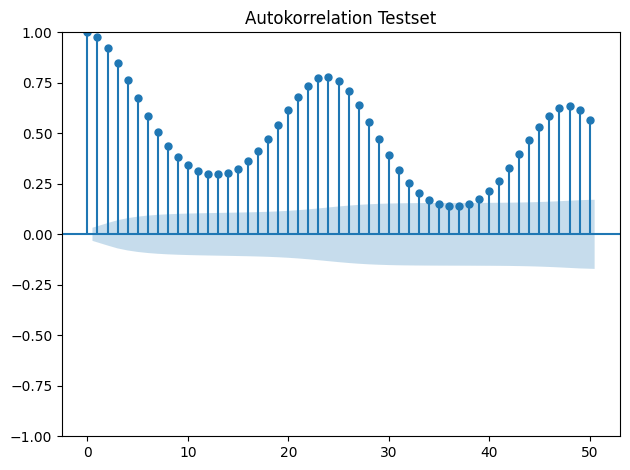

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 5. Statistische Kennzahlen ausgeben
print("Trainingsset:")
print(Strom_train_norm.describe())
print("\nValidierungsset:")
print(Strom_valid_norm.describe())
print("\nTestset:")
print(Strom_test_norm.describe())

# 6. Zeitreihenplot (gesamte Daten)
plt.figure(figsize=(15, 5))
plt.plot(Strom_train_norm.index, Strom_train_norm, label='Trainingsset')
plt.plot(Strom_valid_norm.index, Strom_valid_norm, label='Validierungsset')
plt.plot(Strom_test_norm.index, Strom_test_norm, label='Testset')
plt.title('Zeitreihenvergleich (gesamte Daten)')
plt.xlabel('Datum')
plt.ylabel('Stromerzeugung (normalisiert)')
plt.legend()
plt.tight_layout()
plt.show()

# 7. Histogramm der Verteilungen
plt.figure(figsize=(12, 5))
plt.hist(Strom_train_norm, bins=50, alpha=0.5, label='Trainingsset')
plt.hist(Strom_valid_norm, bins=50, alpha=0.5, label='Validierungsset')
plt.hist(Strom_test_norm, bins=50, alpha=0.5, label='Testset')
plt.title('Histogramm der Stromerzeugung (normalisiert)')
plt.xlabel('Stromerzeugung (normalisiert)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.tight_layout()
plt.show()


# 9. Autokorrelationsfunktion (ACF) für jedes Set
plt.figure(figsize=(12, 4))
plot_acf(Strom_train_norm, lags=50, alpha=0.05, title='Autokorrelation Trainingsset')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plot_acf(Strom_valid_norm, lags=50, alpha=0.05, title='Autokorrelation Validierungsset')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plot_acf(Strom_test_norm, lags=50, alpha=0.05, title='Autokorrelation Testset')
plt.tight_layout()
plt.show()

Trainingsset:
count    30647.000000
mean     15181.323319
std       2453.895349
min       7749.750000
25%      13370.500000
50%      15192.750000
75%      17062.625000
max      24123.500000
Name: Stromerzeugung Gesamt, dtype: float64

Validierungsset:
count     4417.000000
mean     15472.498698
std       2357.696703
min       9593.250000
25%      13558.250000
50%      15426.750000
75%      17454.250000
max      20716.000000
Name: Stromerzeugung Gesamt, dtype: float64

Testset:
count     3647.000000
mean     15733.855223
std       2713.836707
min       8131.500000
25%      13842.375000
50%      15847.750000
75%      17701.000000
max      21317.250000
Name: Stromerzeugung Gesamt, dtype: float64


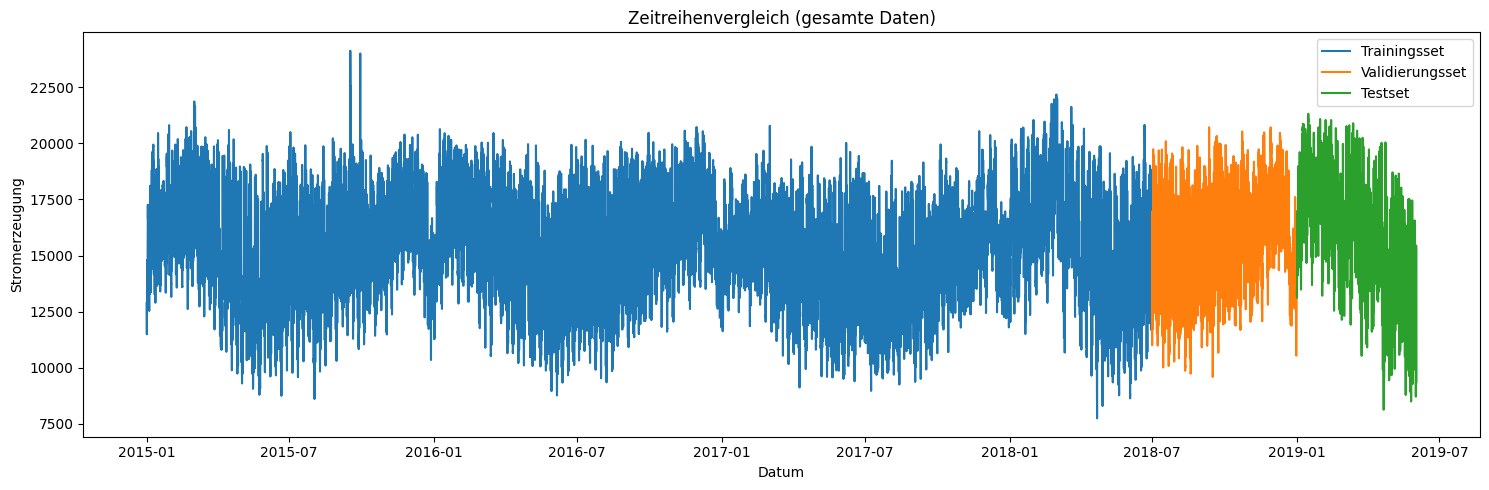

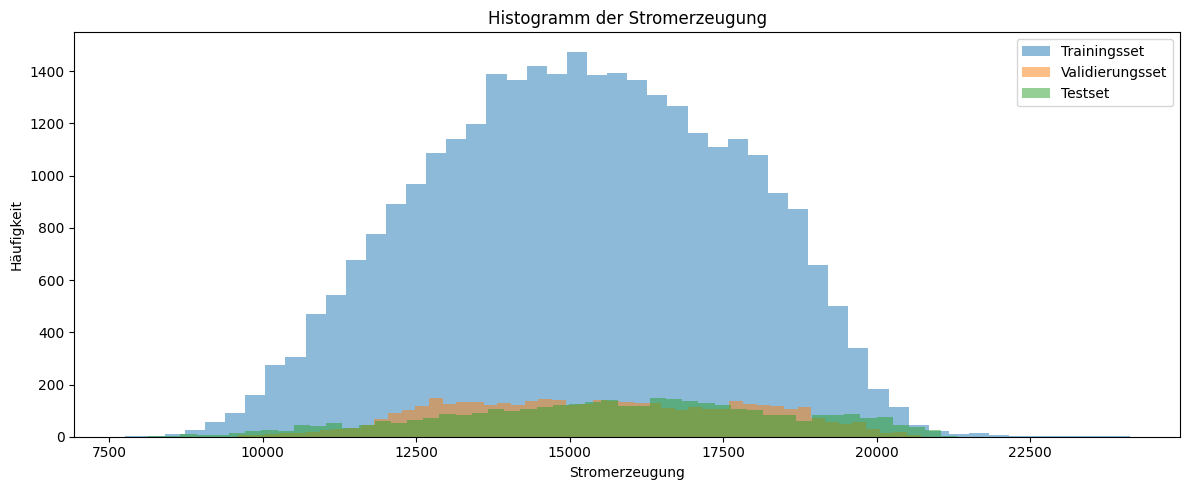

<Figure size 1200x400 with 0 Axes>

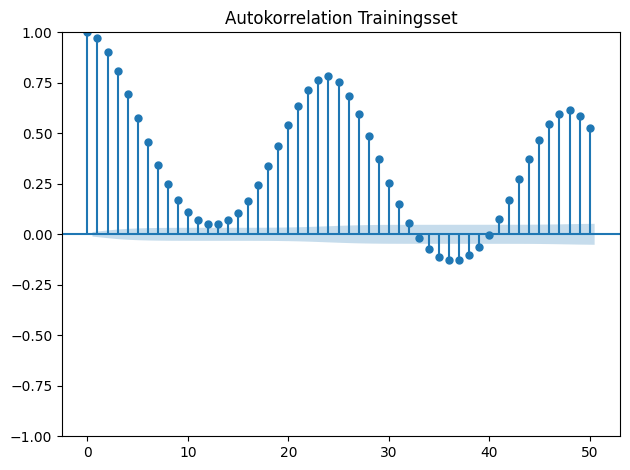

<Figure size 1200x400 with 0 Axes>

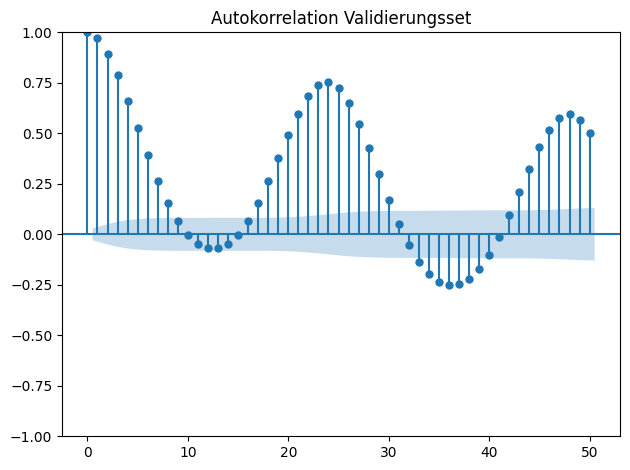

<Figure size 1200x400 with 0 Axes>

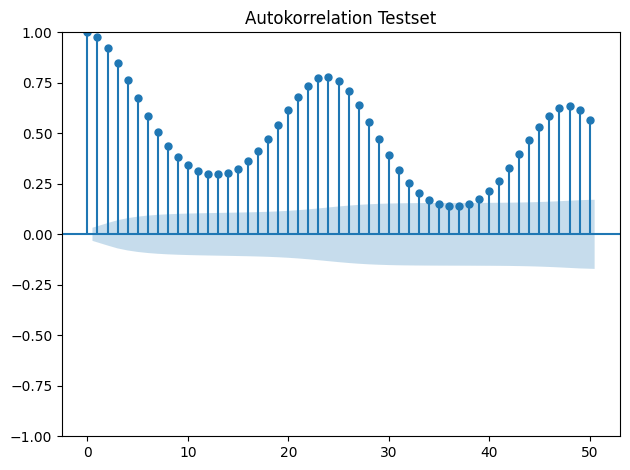

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 1. Statistische Kennzahlen ausgeben
print("Trainingsset:")
print(Strom_train.describe())
print("\nValidierungsset:")
print(Strom_valid.describe())
print("\nTestset:")
print(Strom_test.describe())

# 2. Zeitreihenplot (gesamte Daten)
plt.figure(figsize=(15, 5))
plt.plot(Strom_train.index, Strom_train, label='Trainingsset')
plt.plot(Strom_valid.index, Strom_valid, label='Validierungsset')
plt.plot(Strom_test.index, Strom_test, label='Testset')
plt.title('Zeitreihenvergleich (gesamte Daten)')
plt.xlabel('Datum')
plt.ylabel('Stromerzeugung')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Histogramm der Verteilungen
plt.figure(figsize=(12, 5))
plt.hist(Strom_train, bins=50, alpha=0.5, label='Trainingsset')
plt.hist(Strom_valid, bins=50, alpha=0.5, label='Validierungsset')
plt.hist(Strom_test, bins=50, alpha=0.5, label='Testset')
plt.title('Histogramm der Stromerzeugung')
plt.xlabel('Stromerzeugung')
plt.ylabel('Häufigkeit')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Autokorrelationsfunktion (ACF) für jedes Set
plt.figure(figsize=(12, 4))
plot_acf(Strom_train, lags=50, alpha=0.05, title='Autokorrelation Trainingsset')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plot_acf(Strom_valid, lags=50, alpha=0.05, title='Autokorrelation Validierungsset')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plot_acf(Strom_test, lags=50, alpha=0.05, title='Autokorrelation Testset')
plt.tight_layout()
plt.show()


## Modell laden (1h)

In [ ]:
/kaggle/input/modelle/model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128

Beste Epoche: 54, val_loss: 0.008061266504228115


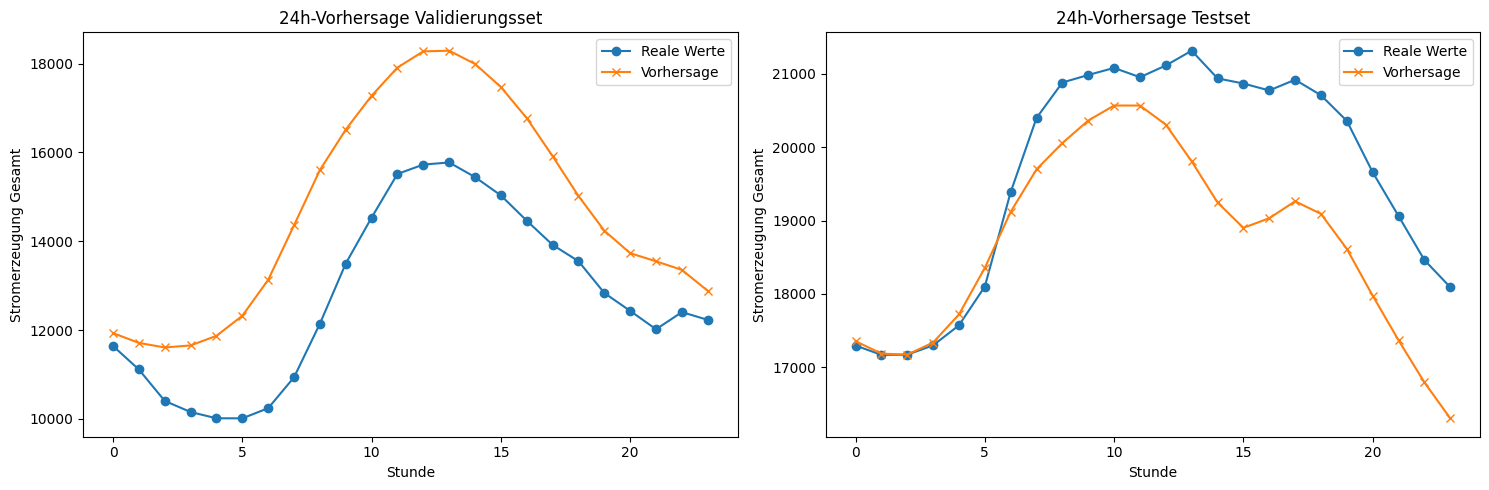

In [26]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ==== KONFIGURATION ====
input_dir = '/kaggle/input/modelle'  # ggf. anpassen
model_name = "model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128"
model_dir = os.path.join(input_dir, model_name)
history_path = os.path.join(model_dir, f"{model_name}_history.pkl")

# ==== Bestes Modell finden und laden ====
with open(history_path, 'rb') as file:
    history = pickle.load(file)
best_epoch = min(range(len(history['val_loss'])), key=lambda i: history['val_loss'][i])
print(f"Beste Epoche: {best_epoch+1}, val_loss: {history['val_loss'][best_epoch]}")
best_model_path = os.path.join(model_dir, f"{model_name}-epoch-{best_epoch+1:02d}.keras")
best_model = tf.keras.models.load_model(best_model_path)

# ==== Hilfsfunktion für 24h-Vorhersage ====
def make_24h_prediction(series_norm, seq_length, model, mean, std):
    input_seq = series_norm.iloc[:seq_length].to_numpy().reshape(1, seq_length, 1)
    preds = []
    current_input = input_seq.copy()
    for _ in range(24):
        pred = model.predict(current_input, verbose=0)
        preds.append(pred[0, 0])
        current_input = np.concatenate([current_input[:, 1:, :], pred.reshape(1, 1, 1)], axis=1)
    preds = np.array(preds)
    real_values = series_norm.iloc[seq_length:seq_length+24].to_numpy()
    preds_denorm = preds * std + mean
    real_denorm = real_values * std + mean
    return preds_denorm, real_denorm

# ==== 24h-Vorhersage für Validation und Test ====
seq_length = 336  # wie im Training

# ACHTUNG: Nutze die normalisierten Sets!
preds_valid_denorm, real_valid_denorm = make_24h_prediction(Strom_valid_norm, seq_length, best_model, mean, std)
preds_test_denorm, real_test_denorm = make_24h_prediction(Strom_test_norm, seq_length, best_model, mean, std)

# ==== Plots nebeneinander ====
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Validation
axs[0].plot(range(24), real_valid_denorm, label='Reale Werte', marker='o')
axs[0].plot(range(24), preds_valid_denorm, label='Vorhersage', marker='x')
axs[0].set_title('24h-Vorhersage Validierungsset')
axs[0].set_xlabel('Stunde')
axs[0].set_ylabel('Stromerzeugung Gesamt')
axs[0].legend()

# Test
axs[1].plot(range(24), real_test_denorm, label='Reale Werte', marker='o')
axs[1].plot(range(24), preds_test_denorm, label='Vorhersage', marker='x')
axs[1].set_title('24h-Vorhersage Testset')
axs[1].set_xlabel('Stunde')
axs[1].set_ylabel('Stromerzeugung Gesamt')
axs[1].legend()

plt.tight_layout()
plt.show()


model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128: Beste Epoche: 54, val_loss: 0.008061266504228115
model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128: Beste Epoche: 42, val_loss: 0.008301328867673874


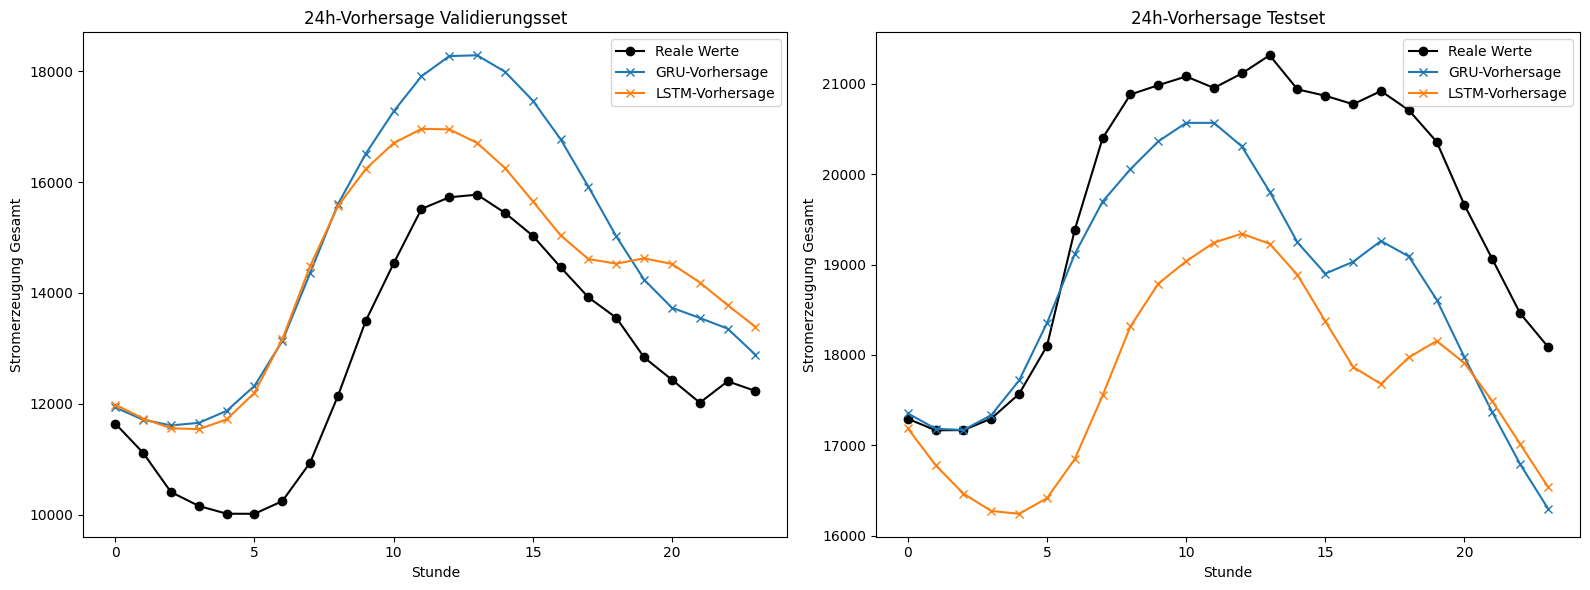

In [28]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ==== KONFIGURATION ====
input_dir = '/kaggle/input/modelle'  # ggf. anpassen

# Modell 1: GRU
gru_name = "model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128"
gru_dir = os.path.join(input_dir, gru_name)
gru_history_path = os.path.join(gru_dir, f"{gru_name}_history.pkl")

# Modell 2: LSTM
lstm_name = "model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128"
lstm_dir = os.path.join(input_dir, lstm_name)
lstm_history_path = os.path.join(lstm_dir, f"{lstm_name}_history.pkl")

# ==== Funktion zum Finden und Laden des besten Modells ====
def load_best_model(model_dir, history_path, model_name):
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
    best_epoch = np.argmin(history['val_loss'])
    print(f"{model_name}: Beste Epoche: {best_epoch+1}, val_loss: {history['val_loss'][best_epoch]}")
    best_model_path = os.path.join(model_dir, f"{model_name}-epoch-{best_epoch+1:02d}.keras")
    model = tf.keras.models.load_model(best_model_path)
    return model, best_epoch, history

# ==== Hilfsfunktion für 24h-Vorhersage ====
def make_24h_prediction(series_norm, seq_length, model, mean, std):
    input_seq = series_norm.iloc[:seq_length].to_numpy().reshape(1, seq_length, 1)
    preds = []
    for _ in range(24):
        pred = model.predict(input_seq, verbose=0)
        preds.append(pred[0, 0])
        input_seq = np.concatenate([input_seq[:, 1:, :], pred.reshape(1, 1, 1)], axis=1)
    preds = np.array(preds)
    real = series_norm.iloc[seq_length:seq_length+24].to_numpy()
    return preds * std + mean, real * std + mean

# ==== Modelle laden ====
gru_model, gru_best_epoch, gru_history = load_best_model(gru_dir, gru_history_path, gru_name)
lstm_model, lstm_best_epoch, lstm_history = load_best_model(lstm_dir, lstm_history_path, lstm_name)

# ==== 24h-Vorhersage für Validation und Test ====
seq_length = 336  # wie im Training

# Annahme: Strom_valid_norm, Strom_test_norm, mean, std sind im Workspace definiert

# GRU
gru_preds_valid, gru_real_valid = make_24h_prediction(Strom_valid_norm, seq_length, gru_model, mean, std)
gru_preds_test, gru_real_test = make_24h_prediction(Strom_test_norm, seq_length, gru_model, mean, std)

# LSTM
lstm_preds_valid, lstm_real_valid = make_24h_prediction(Strom_valid_norm, seq_length, lstm_model, mean, std)
lstm_preds_test, lstm_real_test = make_24h_prediction(Strom_test_norm, seq_length, lstm_model, mean, std)

# ==== Plots nebeneinander ====
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Validation
axs[0].plot(gru_real_valid, label='Reale Werte', marker='o', color='black')
axs[0].plot(gru_preds_valid, label='GRU-Vorhersage', marker='x', color='tab:blue')
axs[0].plot(lstm_preds_valid, label='LSTM-Vorhersage', marker='x', color='tab:orange')
axs[0].set_title('24h-Vorhersage Validierungsset')
axs[0].set_xlabel('Stunde')
axs[0].set_ylabel('Stromerzeugung Gesamt')
axs[0].legend()

# Test
axs[1].plot(gru_real_test, label='Reale Werte', marker='o', color='black')
axs[1].plot(gru_preds_test, label='GRU-Vorhersage', marker='x', color='tab:blue')
axs[1].plot(lstm_preds_test, label='LSTM-Vorhersage', marker='x', color='tab:orange')
axs[1].set_title('24h-Vorhersage Testset')
axs[1].set_xlabel('Stunde')
axs[1].set_ylabel('Stromerzeugung Gesamt')
axs[1].legend()

plt.tight_layout()
plt.show()


model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128: Beste Epoche: 54, val_loss: 0.008061266504228115
model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128: Beste Epoche: 42, val_loss: 0.008301328867673874
model_1Hour_LSTM64_gradclip_RedPl_seq336: Beste Epoche: 98, val_loss: 0.04384337738156319
model_1Hour_GRU64_gradclip_RedPl_seq336: Beste Epoche: 93, val_loss: 0.04268714785575867


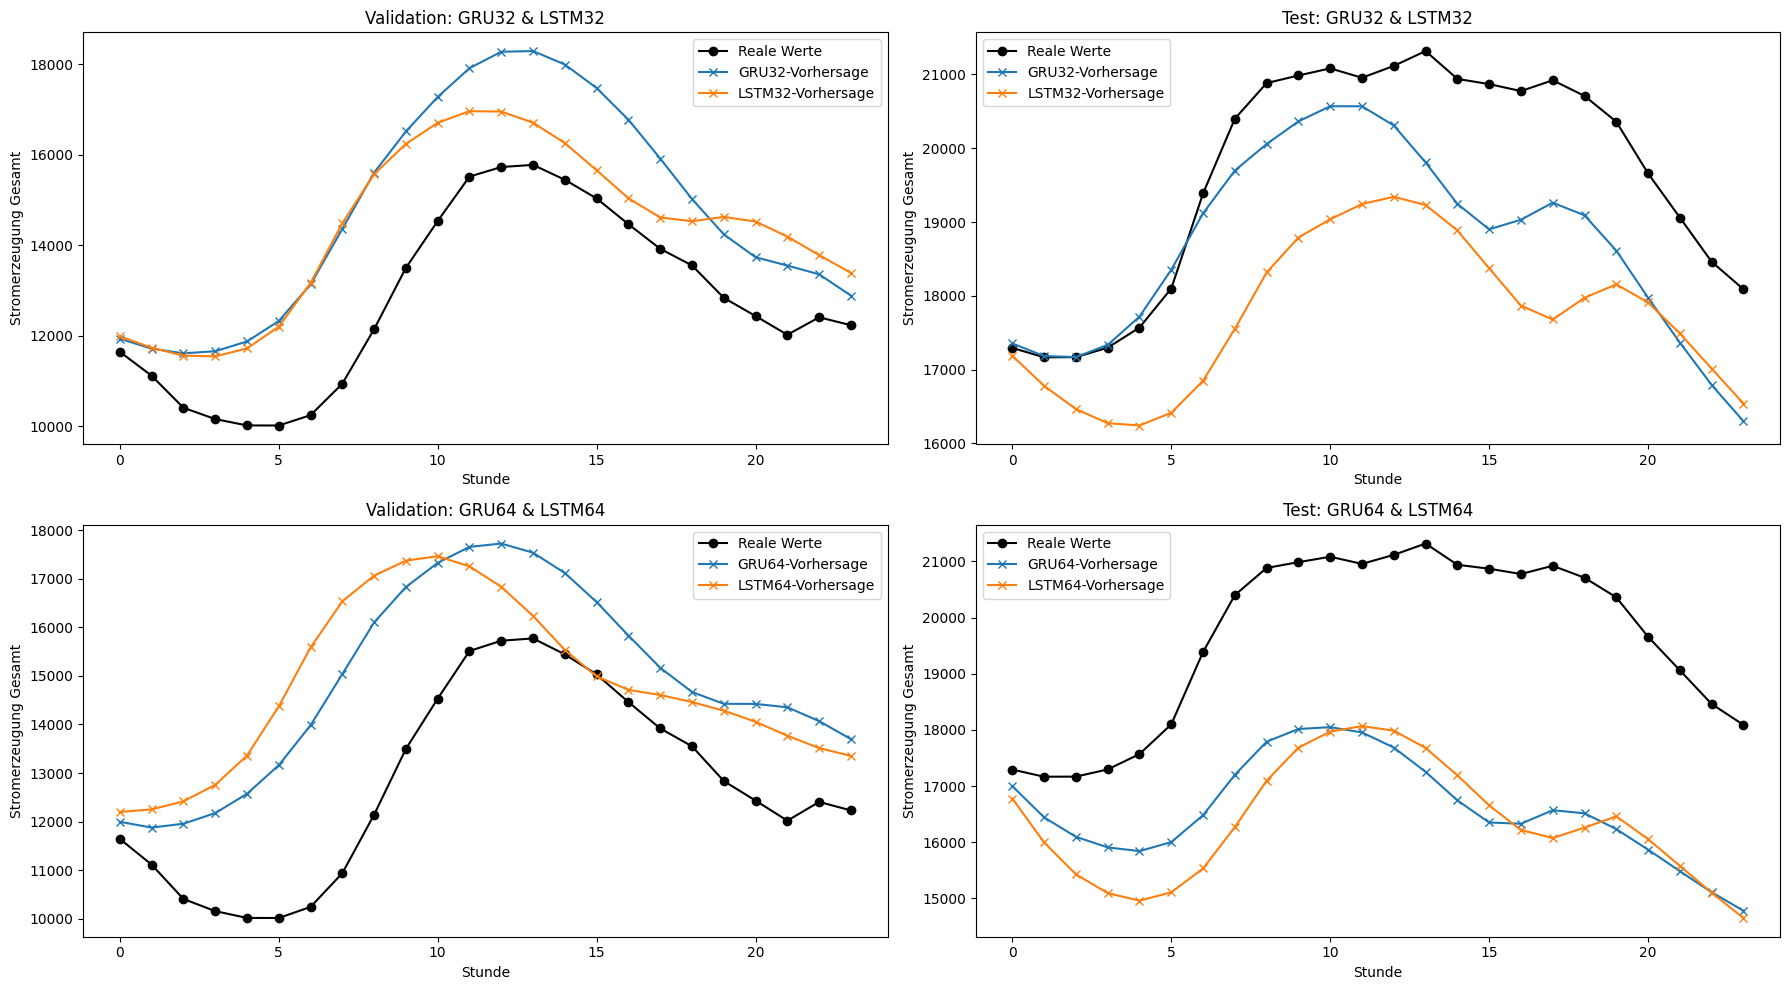

In [31]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ==== KONFIGURATION ====
input_dir = '/kaggle/input/modelle'  # ggf. anpassen

# Modell 1: GRU32
gru32_name = "model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128"
gru32_dir = os.path.join(input_dir, gru32_name)
gru32_history_path = os.path.join(gru32_dir, f"{gru32_name}_history.pkl")

# Modell 2: LSTM32
lstm32_name = "model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128"
lstm32_dir = os.path.join(input_dir, lstm32_name)
lstm32_history_path = os.path.join(lstm32_dir, f"{lstm32_name}_history.pkl")

# Modell 3: LSTM64
lstm64_name = "model_1Hour_LSTM64_gradclip_RedPl_seq336"
lstm64_dir = os.path.join(input_dir, lstm64_name)
lstm64_history_path = os.path.join(lstm64_dir, f"{lstm64_name}_history.pkl")

# Modell 4: GRU64
gru64_name = "model_1Hour_GRU64_gradclip_RedPl_seq336"
gru64_dir = os.path.join(input_dir, gru64_name)
gru64_history_path = os.path.join(gru64_dir, f"{gru64_name}_history.pkl")

# ==== Funktion zum Finden und Laden des besten Modells ====
def load_best_model(model_dir, history_path, model_name):
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
    best_epoch = np.argmin(history['val_loss'])
    print(f"{model_name}: Beste Epoche: {best_epoch+1}, val_loss: {history['val_loss'][best_epoch]}")
    best_model_path = os.path.join(model_dir, f"{model_name}-epoch-{best_epoch+1:02d}.keras")
    model = tf.keras.models.load_model(best_model_path)
    return model, best_epoch, history

# ==== Hilfsfunktion für 24h-Vorhersage ====
def make_24h_prediction(series_norm, seq_length, model, mean, std):
    input_seq = series_norm.iloc[:seq_length].to_numpy().reshape(1, seq_length, 1)
    preds = []
    for _ in range(24):
        pred = model.predict(input_seq, verbose=0)
        preds.append(pred[0, 0])
        input_seq = np.concatenate([input_seq[:, 1:, :], pred.reshape(1, 1, 1)], axis=1)
    preds = np.array(preds)
    real = series_norm.iloc[seq_length:seq_length+24].to_numpy()
    return preds * std + mean, real * std + mean

# ==== Modelle laden ====
gru32_model, gru32_best_epoch, gru32_history = load_best_model(gru32_dir, gru32_history_path, gru32_name)
lstm32_model, lstm32_best_epoch, lstm32_history = load_best_model(lstm32_dir, lstm32_history_path, lstm32_name)
lstm64_model, lstm64_best_epoch, lstm64_history = load_best_model(lstm64_dir, lstm64_history_path, lstm64_name)
gru64_model, gru64_best_epoch, gru64_history = load_best_model(gru64_dir, gru64_history_path, gru64_name)

# ==== 24h-Vorhersage für Validation und Test ====
seq_length = 336  # wie im Training

# Annahme: Strom_valid_norm, Strom_test_norm, mean, std sind im Workspace definiert

# GRU32
gru32_preds_valid, gru32_real_valid = make_24h_prediction(Strom_valid_norm, seq_length, gru32_model, mean, std)
gru32_preds_test, gru32_real_test = make_24h_prediction(Strom_test_norm, seq_length, gru32_model, mean, std)

# LSTM32
lstm32_preds_valid, lstm32_real_valid = make_24h_prediction(Strom_valid_norm, seq_length, lstm32_model, mean, std)
lstm32_preds_test, lstm32_real_test = make_24h_prediction(Strom_test_norm, seq_length, lstm32_model, mean, std)

# LSTM64
lstm64_preds_valid, lstm64_real_valid = make_24h_prediction(Strom_valid_norm, seq_length, lstm64_model, mean, std)
lstm64_preds_test, lstm64_real_test = make_24h_prediction(Strom_test_norm, seq_length, lstm64_model, mean, std)

# GRU64
gru64_preds_valid, gru64_real_valid = make_24h_prediction(Strom_valid_norm, seq_length, gru64_model, mean, std)
gru64_preds_test, gru64_real_test = make_24h_prediction(Strom_test_norm, seq_length, gru64_model, mean, std)

# ==== 2x2 Matrix aus Plots ====
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# Plot 1: GRU32 & LSTM32
axs[0, 0].plot(gru32_real_valid, label='Reale Werte', marker='o', color='black')
axs[0, 0].plot(gru32_preds_valid, label='GRU32-Vorhersage', marker='x', color='tab:blue')
axs[0, 0].plot(lstm32_preds_valid, label='LSTM32-Vorhersage', marker='x', color='tab:orange')
axs[0, 0].set_title('Validation: GRU32 & LSTM32')
axs[0, 0].set_xlabel('Stunde')
axs[0, 0].set_ylabel('Stromerzeugung Gesamt')
axs[0, 0].legend()

axs[0, 1].plot(gru32_real_test, label='Reale Werte', marker='o', color='black')
axs[0, 1].plot(gru32_preds_test, label='GRU32-Vorhersage', marker='x', color='tab:blue')
axs[0, 1].plot(lstm32_preds_test, label='LSTM32-Vorhersage', marker='x', color='tab:orange')
axs[0, 1].set_title('Test: GRU32 & LSTM32')
axs[0, 1].set_xlabel('Stunde')
axs[0, 1].set_ylabel('Stromerzeugung Gesamt')
axs[0, 1].legend()

# Plot 2: GRU64 & LSTM64
axs[1, 0].plot(gru64_real_valid, label='Reale Werte', marker='o', color='black')
axs[1, 0].plot(gru64_preds_valid, label='GRU64-Vorhersage', marker='x', color='tab:blue')
axs[1, 0].plot(lstm64_preds_valid, label='LSTM64-Vorhersage', marker='x', color='tab:orange')
axs[1, 0].set_title('Validation: GRU64 & LSTM64')
axs[1, 0].set_xlabel('Stunde')
axs[1, 0].set_ylabel('Stromerzeugung Gesamt')
axs[1, 0].legend()

axs[1, 1].plot(gru64_real_test, label='Reale Werte', marker='o', color='black')
axs[1, 1].plot(gru64_preds_test, label='GRU64-Vorhersage', marker='x', color='tab:blue')
axs[1, 1].plot(lstm64_preds_test, label='LSTM64-Vorhersage', marker='x', color='tab:orange')
axs[1, 1].set_title('Test: GRU64 & LSTM64')
axs[1, 1].set_xlabel('Stunde')
axs[1, 1].set_ylabel('Stromerzeugung Gesamt')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# ==== KONFIGURATION ====
input_dir = '/kaggle/input/modelle'  # ggf. anpassen

# Modell 1: GRU32
gru32_name = "model_1Hour_GRU32x2_gradclip_RedPl_seq336_B128"
gru32_dir = os.path.join(input_dir, gru32_name)
gru32_history_path = os.path.join(gru32_dir, f"{gru32_name}_history.pkl")

# Modell 2: LSTM32
lstm32_name = "model_1Hour_LSTM32x2_gradclip_RedPl_seq336_B128"
lstm32_dir = os.path.join(input_dir, lstm32_name)
lstm32_history_path = os.path.join(lstm32_dir, f"{lstm32_name}_history.pkl")

# Modell 3: LSTM64
lstm64_name = "model_1Hour_LSTM64_gradclip_RedPl_seq336"
lstm64_dir = os.path.join(input_dir, lstm64_name)
lstm64_history_path = os.path.join(lstm64_dir, f"{lstm64_name}_history.pkl")

# Modell 4: GRU64
gru64_name = "model_1Hour_GRU64_gradclip_RedPl_seq336"
gru64_dir = os.path.join(input_dir, gru64_name)
gru64_history_path = os.path.join(gru64_dir, f"{gru64_name}_history.pkl")

# ==== SEPARATE STARTZEITEN FÜR VALIDIERUNG UND TEST ====
start_time_valid = '2019-02-15 06:00:00'  # Beispiel für Validation
start_time_test = '2019-03-01 06:00:00'   # Beispiel für Test
seq_length = 336

# ==== Funktion zum Finden und Laden des besten Modells ====
def load_best_model(model_dir, history_path, model_name):
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
    best_epoch = np.argmin(history['val_loss'])
    print(f"{model_name}: Beste Epoche: {best_epoch+1}, val_loss: {history['val_loss'][best_epoch]}")
    best_model_path = os.path.join(model_dir, f"{model_name}-epoch-{best_epoch+1:02d}.keras")
    model = tf.keras.models.load_model(best_model_path)
    return model

# ==== Hilfsfunktion für 24h-Vorhersage ab beliebigem Timestamp ====
def make_24h_prediction(series_norm, start_time, seq_length, model, mean, std):
    if not isinstance(series_norm.index, pd.DatetimeIndex):
        raise ValueError("Der Index der Zeitreihe muss ein DatetimeIndex sein.")
    if start_time not in series_norm.index:
        raise ValueError(f"Startzeitpunkt {start_time} nicht im Index der Zeitreihe vorhanden.")
    start_idx = series_norm.index.get_loc(start_time)
    input_seq = series_norm.iloc[start_idx : start_idx + seq_length].to_numpy().reshape(1, seq_length, 1)
    preds = []
    current_input = input_seq.copy()
    for _ in range(24):
        pred = model.predict(current_input, verbose=0)
        preds.append(pred[0, 0])
        current_input = np.concatenate([current_input[:, 1:, :], pred.reshape(1, 1, 1)], axis=1)
    preds = np.array(preds)
    real = series_norm.iloc[start_idx + seq_length : start_idx + seq_length + 24].to_numpy()
    return preds * std + mean, real * std + mean

# ==== Modelle laden ====
gru32_model = load_best_model(gru32_dir, gru32_history_path, gru32_name)
lstm32_model = load_best_model(lstm32_dir, lstm32_history_path, lstm32_name)
lstm64_model = load_best_model(lstm64_dir, lstm64_history_path, lstm64_name)
gru64_model = load_best_model(gru64_dir, gru64_history_path, gru64_name)

# ==== Vorhersagen für Validation und Test mit unterschiedlichen Startzeiten ====
# Annahme: Strom_valid_norm, Strom_test_norm, mean, std sind im Workspace definiert

series_dict = {
    "Validation": (Strom_valid_norm, pd.Timestamp(start_time_valid)),
    "Test": (Strom_test_norm, pd.Timestamp(start_time_test))
}

results = {
    "GRU32": {},
    "LSTM32": {},
    "GRU64": {},
    "LSTM64": {}
}

for label, model in zip(["GRU32", "LSTM32", "LSTM64", "GRU64"],
                        [gru32_model, lstm32_model, lstm64_model, gru64_model]):
    for set_name, (series_norm, start_time) in series_dict.items():
        preds, real = make_24h_prediction(
            series_norm,
            start_time,
            seq_length,
            model,
            mean,
            std
        )
        results[label][set_name] = (preds, real)

# ==== 2x2 Matrix aus Plots ====
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# Oben: GRU32 & LSTM32, Unten: GRU64 & LSTM64
pairs = [("GRU32", "LSTM32"), ("GRU64", "LSTM64")]

for row, (label1, label2) in enumerate(pairs):
    # Validation (links)
    preds1, real1 = results[label1]["Validation"]
    preds2, _ = results[label2]["Validation"]
    axs[row, 0].plot(real1, label='Reale Werte', marker='o', color='black')
    axs[row, 0].plot(preds1, label=f'{label1}-Vorhersage', marker='x', color='tab:blue')
    axs[row, 0].plot(preds2, label=f'{label2}-Vorhersage', marker='x', color='tab:orange')
    axs[row, 0].set_title(f'Validation: {label1} & {label2}\nStart: {start_time_valid}')
    axs[row, 0].set_xlabel('Stunde')
    axs[row, 0].set_ylabel('Stromerzeugung Gesamt')
    axs[row, 0].legend()
    # Test (rechts)
    preds1, real1 = results[label1]["Test"]
    preds2, _ = results[label2]["Test"]
    axs[row, 1].plot(real1, label='Reale Werte', marker='o', color='black')
    axs[row, 1].plot(preds1, label=f'{label1}-Vorhersage', marker='x', color='tab:blue')
    axs[row, 1].plot(preds2, label=f'{label2}-Vorhersage', marker='x', color='tab:orange')
    axs[row, 1].set_title(f'Test: {label1} & {label2}\nStart: {start_time_test}')
    axs[row, 1].set_xlabel('Stunde')
    axs[row, 1].set_ylabel('Stromerzeugung Gesamt')
    axs[row, 1].legend()

plt.tight_layout()
plt.show()
